# **_Reinforcement Learning tools for Auto-Stock Trading_**  

### 1. Importing Necessary Libraries

In [1]:
#Basic Data Science Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
%matplotlib inline

In [2]:
#Finrl utilities
from finrl import config
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import data_split
from finrl.agents.stablebaselines3.models import DRLAgent

C:\Users\Vansh\anaconda3\envs\tf_gpu\lib\site-packages\exchange_calendars\exchange_calendar.py:2347: FutureWarning: 'T' is deprecated and will be removed in a future version. Please use 'min' instead of 'T'.
  align: pd.Timedelta | str = pd.Timedelta(1, "T"),


In [3]:
#Processing Utilities
import datetime
import itertools


In [4]:
#Make finrl imports accessible
import sys
sys.path.append("../FinRL-Library")

In [5]:
#Setup libraries
from __future__ import annotations
#postponed evaluation of type annotations and evaluation available at runtime

In [6]:
#other imports will be used wherever applicable

In [7]:
symbols = [
    "SAP",
    "SIE.DE",
    "DTE.DE",
    "ALV.DE",
    "P911.DE",
    "MBG.DE",
    "BMW.DE",
    "VOW3.DE",
    "MRK.DE",
    "SHL.DE",
    "MUV2.DE",
    "BAS.DE",
    "DHL.DE",
    "IFX.DE",
    "DTG.F",
    "ADS.DE",
    "DB1.DE",
    "EOAN.DE",
    "DB",
    "BEI.DE",
    "HNR1.DE",
    "HEN3.DE",
    "BAYN.DE",
    "HLAG.DE",
    "RHM.F",
    "RWE.DE",
    "UN0.DE",
    "SRT.DE",
    "VNA.DE",
    "EBK.DE"
]


In [8]:
#Globally accesible training and trading s/e
TRAIN_START_DATE = '2010-01-01'
TRAIN_END_DATE = '2020-07-01'
TRADE_START_DATE = '2020-07-01'
TRADE_END_DATE = '2023-05-01'

In [9]:

df_raw = YahooDownloader(start_date = TRAIN_START_DATE,
                                end_date = TRADE_END_DATE,
                                ticker_list = symbols).fetch_data()

C:\Users\Vansh\anaconda3\envs\tf_gpu\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\Vansh\anaconda3\envs\tf_gpu\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\Vansh\anaconda3\envs\tf_gpu\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[***************

Shape of DataFrame:  (89019, 8)


In [13]:
list_ticker = df_raw["tic"].unique().tolist()
print(len(list_ticker))

30


In [14]:
df_raw.to_csv("German30.csv")

### 2. Loading the Data

In [15]:
df_raw=pd.read_csv('datasets/German30.csv')

In [16]:
df_raw.head()

,Unnamed: 0,date,open,high,low,close,volume,tic,day
0,0,2010-01-04,37.959999,38.525002,37.685001,32.097500,953276,ADS.DE,0
1,1,2010-01-04,87.800003,88.889999,87.599998,45.519123,1676777,ALV.DE,0
2,2,2010-01-04,43.459999,44.849998,43.349998,24.102219,3245626,BAS.DE,0
3,3,2010-01-04,55.315983,55.808029,54.863300,36.246857,2251520,BAYN.DE,0
4,4,2010-01-04,45.849998,46.619999,45.799999,40.589378,336203,BEI.DE,0


In [17]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89019 entries, 0 to 89018
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  89019 non-null  int64  
 1   date        89019 non-null  object 
 2   open        89019 non-null  float64
 3   high        89019 non-null  float64
 4   low         89019 non-null  float64
 5   close       89019 non-null  float64
 6   volume      89019 non-null  int64  
 7   tic         89019 non-null  object 
 8   day         89019 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 6.1+ MB


### 3. Preprocessing the data

In [18]:
from finrl.config import INDICATORS
from dataprocessing import FeatureEngineer, load_dataset, data_split, convert_to_datetime

fe = FeatureEngineer(use_technical_indicator=True,
                      tech_indicator_list = INDICATORS,
                      use_vix=False,
                      use_turbulence=True,
                      user_defined_feature = False)

processed = fe.preprocess_data(df_raw)

Successfully added technical indicators


C:\Users\Vansh\Downloads\BTP-2-4-24\dataprocessing.py:236: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_price_pivot = df_price_pivot.pct_change()


Successfully added turbulence index


In [19]:
processed

,Unnamed: 0,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence
0,0,2010-01-04,37.959999,38.525002,37.685001,32.097500,953276,ADS.DE,0,0.000000,34.036234,31.171575,100.000000,66.666667,100.000000,32.097500,32.097500,0.000000
1,1,2010-01-04,87.800003,88.889999,87.599998,45.519123,1676777,ALV.DE,0,0.000000,34.036234,31.171575,100.000000,66.666667,100.000000,45.519123,45.519123,0.000000
2,2,2010-01-04,43.459999,44.849998,43.349998,24.102219,3245626,BAS.DE,0,0.000000,34.036234,31.171575,100.000000,66.666667,100.000000,24.102219,24.102219,0.000000
3,3,2010-01-04,55.315983,55.808029,54.863300,36.246857,2251520,BAYN.DE,0,0.000000,34.036234,31.171575,100.000000,66.666667,100.000000,36.246857,36.246857,0.000000
4,4,2010-01-04,45.849998,46.619999,45.799999,40.589378,336203,BEI.DE,0,0.000000,34.036234,31.171575,100.000000,66.666667,100.000000,40.589378,40.589378,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89014,89014,2023-04-28,147.839996,148.960007,145.000000,144.778015,1499857,SIE.DE,4,0.818645,146.136126,138.239402,55.802756,85.826997,2.627666,140.882916,140.610031,34.552778
89015,89015,2023-04-28,279.000000,283.500000,275.000000,280.752747,3485,SRT.DE,4,-11.216106,343.774246,265.753419,38.637826,-142.884955,40.374427,307.660860,322.149865,34.552778
89016,89016,2023-04-28,76.080002,78.220001,74.739998,76.800003,15031,UN0.DE,4,1.829028,84.032621,66.119378,56.385330,59.641091,21.862151,71.330667,65.167333,34.552778
89017,89017,2023-04-28,19.239672,19.781424,18.931519,18.598259,3546817,VNA.DE,4,-0.073794,19.140956,15.783496,46.893481,97.015975,8.687114,17.212590,20.079092,34.552778


In [20]:
df=processed

In [21]:
list_ticker = df["tic"].unique().tolist()
# only apply to daily level data, need to fix for minute level
list_date = list(pd.date_range(df['date'].min(),df['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

df_full = pd.DataFrame(combination,columns=["date","tic"]).merge(df,on=["date","tic"],how="left")
df_full = df_full[df_full['date'].isin(df['date'])]
df_full = df_full.sort_values(['date','tic'])
df_full = df_full.fillna(1)

In [22]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103230 entries, 0 to 145883
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          103230 non-null  object 
 1   tic           103230 non-null  object 
 2   Unnamed: 0    103230 non-null  float64
 3   open          103230 non-null  float64
 4   high          103230 non-null  float64
 5   low           103230 non-null  float64
 6   close         103230 non-null  float64
 7   volume        103230 non-null  float64
 8   day           103230 non-null  float64
 9   macd          103230 non-null  float64
 10  boll_ub       103230 non-null  float64
 11  boll_lb       103230 non-null  float64
 12  rsi_30        103230 non-null  float64
 13  cci_30        103230 non-null  float64
 14  dx_30         103230 non-null  float64
 15  close_30_sma  103230 non-null  float64
 16  close_60_sma  103230 non-null  float64
 17  turbulence    103230 non-null  float64
dtypes: float6

In [23]:
df=df_full

In [24]:
df.head()

,date,tic,Unnamed: 0,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence
0,2010-01-04,ADS.DE,0.0,37.959999,38.525002,37.685001,32.097500,953276.0,0.0,0.0,34.036234,31.171575,100.0,66.666667,100.0,32.097500,32.097500,0.0
1,2010-01-04,ALV.DE,1.0,87.800003,88.889999,87.599998,45.519123,1676777.0,0.0,0.0,34.036234,31.171575,100.0,66.666667,100.0,45.519123,45.519123,0.0
2,2010-01-04,BAS.DE,2.0,43.459999,44.849998,43.349998,24.102219,3245626.0,0.0,0.0,34.036234,31.171575,100.0,66.666667,100.0,24.102219,24.102219,0.0
3,2010-01-04,BAYN.DE,3.0,55.315983,55.808029,54.863300,36.246857,2251520.0,0.0,0.0,34.036234,31.171575,100.0,66.666667,100.0,36.246857,36.246857,0.0
4,2010-01-04,BEI.DE,4.0,45.849998,46.619999,45.799999,40.589378,336203.0,0.0,0.0,34.036234,31.171575,100.0,66.666667,100.0,40.589378,40.589378,0.0


In [25]:
df.shape

(103230, 18)

### 4.Splitting Training and Trading Data

In [26]:
train = data_split(df, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(df, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))
     

81300
21930


In [27]:
train.to_csv('train_data.csv')
trade.to_csv('trade_data.csv')

### 5. Construction of Trading Environment

In [28]:
from TradingEnv import StockTradingEnv

In [29]:


# Set the corresponding values to 'True' for the algorithms that you want to use
if_using_a2c = True
if_using_ddpg = True
if_using_ppo = True
if_using_td3 = True
if_using_sac = True

### Testing A2C

In [30]:
from stable_baselines3 import A2C, DDPG, PPO, SAC, TD3

trained_a2c = A2C.load("trained_models/agent_a2c") if if_using_a2c else None

C:\Users\Vansh\anaconda3\envs\tf_gpu\lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [31]:
stock_dimension = len(trade.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 301


In [32]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 100000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

In [33]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

In [34]:
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_a2c, 
    environment = e_trade_gym) if if_using_a2c else (None, None)

hit end!


In [35]:
df_account_value_a2c.tail()

,date,account_value
726,2023-04-24,84357.400638
727,2023-04-25,83317.213267
728,2023-04-26,83514.299121
729,2023-04-27,84201.358699
730,2023-04-28,84117.163103


In [36]:
from finrl.plot import backtest_stats
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_a2c)
perf_stats_all = pd.DataFrame(perf_stats_all)


C:\Users\Vansh\anaconda3\envs\tf_gpu\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


==============Get Backtest Results===========
Annual return           -0.057882
Cumulative returns      -0.158828
Annual volatility      381.024179
Sharpe ratio             1.461309
Calmar ratio            -0.058037
Stability                0.009495
Max drawdown            -0.997327
Omega ratio            154.273388
Sortino ratio          358.127872
Skew                          NaN
Kurtosis                      NaN
Tail ratio               0.849231
Daily value at risk    -45.795034
dtype: float64


## Testing DDPG

In [37]:
stock_dimension = len(trade.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 301


In [38]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 100000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

In [39]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

In [40]:
trained_ddpg = DDPG.load("trained_models/agent_ddpg") if if_using_ddpg else None

In [41]:
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_ddpg, 
    environment = e_trade_gym) if if_using_ddpg else (None, None)

hit end!


In [42]:
df_account_value_ddpg.tail()

,date,account_value
726,2023-04-24,78306.287679
727,2023-04-25,76954.070895
728,2023-04-26,77174.603562
729,2023-04-27,78023.802262
730,2023-04-28,77945.778547


In [43]:
from finrl.plot import backtest_stats
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_ddpg)
perf_stats_all = pd.DataFrame(perf_stats_all)


==============Get Backtest Results===========
Annual return           -0.082307
Cumulative returns      -0.220542
Annual volatility      219.016701
Sharpe ratio             0.698494
Calmar ratio            -0.082501
Stability                0.048555
Max drawdown            -0.997655
Omega ratio             40.014991
Sortino ratio          104.097670
Skew                          NaN
Kurtosis                      NaN
Tail ratio               0.918598
Daily value at risk    -26.986440
dtype: float64


## Testing PPO

In [44]:
stock_dimension = len(trade.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 301


In [45]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 100000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

In [46]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

In [47]:
trained_ppo = PPO.load("trained_models/agent_ppo") if if_using_ppo else None

In [48]:
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_ppo, 
    environment = e_trade_gym) if if_using_ppo else (None, None)

hit end!


In [49]:
df_account_value_ppo.tail()

,date,account_value
726,2023-04-24,99281.822962
727,2023-04-25,99322.463079
728,2023-04-26,98660.488510
729,2023-04-27,100126.738705
730,2023-04-28,100026.613206


In [50]:
from finrl.plot import backtest_stats
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_ppo)
perf_stats_all = pd.DataFrame(perf_stats_all)


==============Get Backtest Results===========
Annual return          0.000092
Cumulative returns     0.000266
Annual volatility      4.774560
Sharpe ratio           1.117266
Calmar ratio           0.000106
Stability              0.150555
Max drawdown          -0.867883
Omega ratio            2.295882
Sortino ratio          4.149578
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.832720
Daily value at risk   -0.580370
dtype: float64


## Testing TD3

In [51]:
#retrieve from github

In [52]:
stock_dimension = len(trade.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 301


In [53]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 100000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

In [54]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

In [55]:
trained_td3 = TD3.load("trained_models/agent_td3") if if_using_td3 else None

In [56]:
df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model=trained_td3, 
    environment = e_trade_gym) if if_using_td3 else (None, None)

hit end!


In [57]:
df_account_value_td3.tail()

,date,account_value
726,2023-04-24,139769.111488
727,2023-04-25,139653.318826
728,2023-04-26,138347.956012
729,2023-04-27,136675.830190
730,2023-04-28,136539.154362


In [58]:
from finrl.plot import backtest_stats
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_td3)
perf_stats_all = pd.DataFrame(perf_stats_all)


==============Get Backtest Results===========
Annual return           0.113340
Cumulative returns      0.365392
Annual volatility      77.186164
Sharpe ratio            1.526027
Calmar ratio            0.115295
Stability               0.025188
Max drawdown           -0.983042
Omega ratio            37.070648
Sortino ratio          77.095236
Skew                         NaN
Kurtosis                     NaN
Tail ratio              0.991059
Daily value at risk    -9.257129
dtype: float64


## Testing SAC

In [59]:
stock_dimension = len(trade.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 301


In [60]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 100000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

In [61]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

In [62]:
trained_sac = SAC.load("trained_models/agent_sac") if if_using_sac else None

In [63]:
df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
    model=trained_sac, 
    environment = e_trade_gym) if if_using_sac else (None, None)

hit end!


In [64]:
df_account_value_sac.tail()

,date,account_value
726,2023-04-24,96799.450910
727,2023-04-25,96344.290338
728,2023-04-26,95716.001058
729,2023-04-27,95865.960458
730,2023-04-28,95770.100607


In [65]:
from finrl.plot import backtest_stats
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_sac)
perf_stats_all = pd.DataFrame(perf_stats_all)


==============Get Backtest Results===========
Annual return          -0.014789
Cumulative returns     -0.042299
Annual volatility      42.103326
Sharpe ratio            1.429681
Calmar ratio           -0.015150
Stability               0.008235
Max drawdown           -0.976158
Omega ratio            18.154419
Sortino ratio          40.161061
Skew                         NaN
Kurtosis                     NaN
Tail ratio              0.954556
Daily value at risk    -5.065654
dtype: float64


## Combining and visualizing results

In [66]:
df_result_a2c = df_account_value_a2c.set_index(df_account_value_a2c.columns[0]) if if_using_a2c else None
df_result_ddpg = df_account_value_ddpg.set_index(df_account_value_ddpg.columns[0]) if if_using_ddpg else None
df_result_ppo = df_account_value_ppo.set_index(df_account_value_ppo.columns[0]) if if_using_ppo else None
df_result_td3 = df_account_value_td3.set_index(df_account_value_td3.columns[0]) if if_using_td3 else None
df_result_sac = df_account_value_sac.set_index(df_account_value_sac.columns[0]) if if_using_sac else None

result = pd.DataFrame()
if if_using_a2c: result = pd.merge(result, df_result_a2c, how='outer', left_index=True, right_index=True)
if if_using_ddpg: result = pd.merge(result, df_result_ddpg, how='outer', left_index=True, right_index=True, suffixes=('', '_drop'))
if if_using_ppo: result = pd.merge(result, df_result_ppo, how='outer', left_index=True, right_index=True, suffixes=('', '_drop'))
if if_using_td3: result = pd.merge(result, df_result_td3, how='outer', left_index=True, right_index=True, suffixes=('', '_drop'))
if if_using_sac: result = pd.merge(result, df_result_sac, how='outer', left_index=True, right_index=True, suffixes=('', '_drop'))



In [67]:
col_name = []
col_name.append('A2C') if if_using_a2c else None
col_name.append('DDPG') if if_using_ddpg else None
col_name.append('PPO') if if_using_ppo else None
col_name.append('TD3') if if_using_td3 else None
col_name.append('SAC') if if_using_sac else None
result.columns = col_name

In [68]:
result

,A2C,DDPG,PPO,TD3,SAC
date,,,,,
2020-07-01,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
2020-07-02,101457.065536,101225.747913,100916.042090,102199.992800,101158.343408
2020-07-03,100650.299485,89393.445084,91897.796701,100446.736947,97316.974682
2020-07-06,102001.174586,102045.780861,101768.260672,102586.413613,102322.088127
2020-07-07,101773.300857,101518.969452,100455.413190,102157.493686,101661.007327
...,...,...,...,...,...
2023-04-24,84357.400638,78306.287679,99281.822962,139769.111488,96799.450910
2023-04-25,83317.213267,76954.070895,99322.463079,139653.318826,96344.290338
2023-04-26,83514.299121,77174.603562,98660.488510,138347.956012,95716.001058


<Axes: xlabel='date'>

<Figure size 1500x500 with 0 Axes>

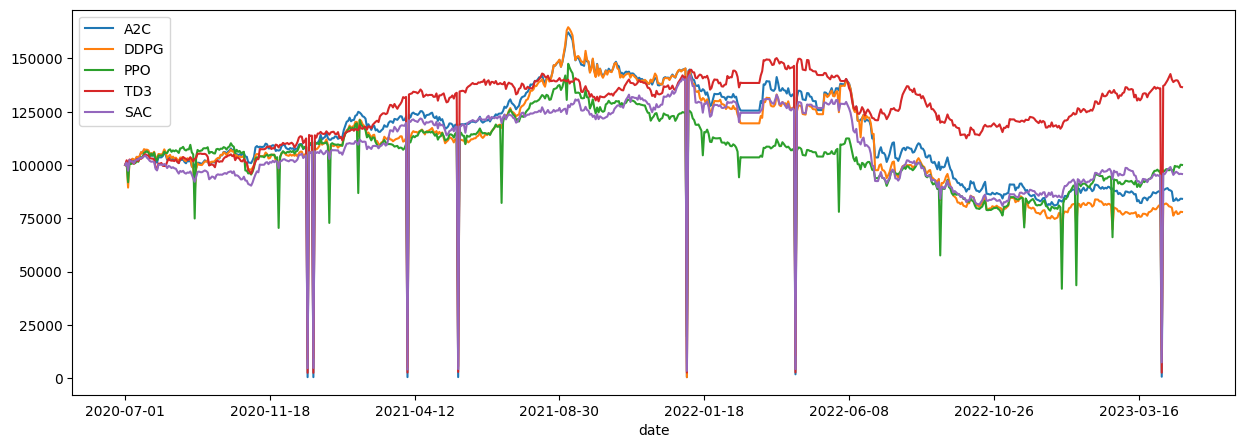

In [69]:
matplotlib.use('Agg')
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure()
result.plot()